In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
import imageio,io
import pydotplus
import graphviz

In [2]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [4]:
df=pd.read_csv("spotify_data.csv")

In [5]:
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [6]:
df.describe()
df.shape
df.info()
type(df)
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [7]:
pos_tempo            = df[df['target']== 1]['tempo']
neg_tempo            = df[df['target']== 0]['tempo']
pos_danceability     = df[df['target']== 1]['danceability']
neg_danceability     = df[df['target']== 0]['danceability']
pos_duration_ms      = df[df['target']== 1]['duration_ms']
neg_duration_ms      = df[df['target']== 0]['duration_ms']
pos_speechiness      = df[df['target']== 1]['speechiness']
neg_speechiness      = df[df['target']== 0]['speechiness']
pos_valence          = df[df['target']== 1]['valence']
neg_valence          = df[df['target']== 0]['valence']
pos_energy           = df[df['target']== 1]['energy']
neg_energy           = df[df['target']== 0]['energy']
pos_acousticness     = df[df['target']== 1]['acousticness']
neg_acousticness     = df[df['target']== 0]['acousticness']
pos_key              = df[df['target']== 1]['key']
neg_key              = df[df['target']== 0]['key']
pos_instrumentalness = df[df['target']== 1]['instrumentalness']
neg_instrumentalness = df[df['target']== 0]['instrumentalness']
pos_duration         = df[df['target']== 1]['duration_ms']
neg_duration         = df[df['target']== 0]['duration_ms']
pos_loudness         = df[df['target']== 1]['loudness']
neg_loudness         = df[df['target']== 0]['loudness']

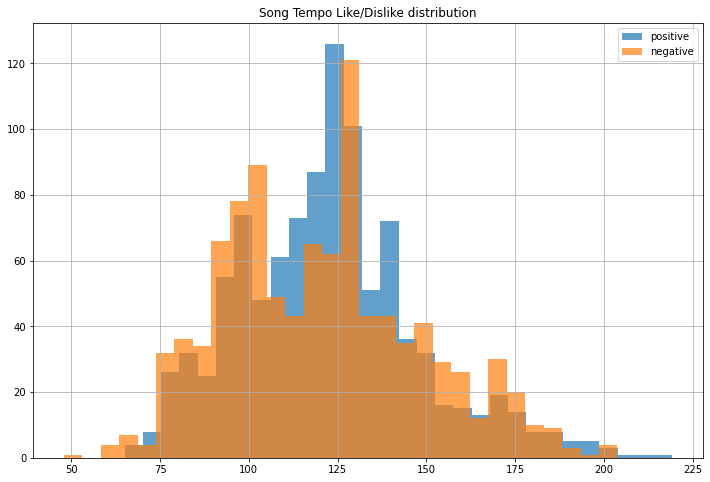

In [8]:
fig = plt.figure(figsize=(12,8))
plt.title('Song Tempo Like/Dislike distribution')
pos_tempo.hist(alpha=0.7,bins=30,label='positive')
neg_tempo.hist(alpha=0.7,bins=30,label='negative')
plt.legend()
plt.show()

<ipython-input-9-42f409eaa282>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax4 = fig2.add_subplot(331)
<ipython-input-9-42f409eaa282>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax6 = fig2.add_subplot(332)
<ipython-input-9-42f409eaa282>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be 

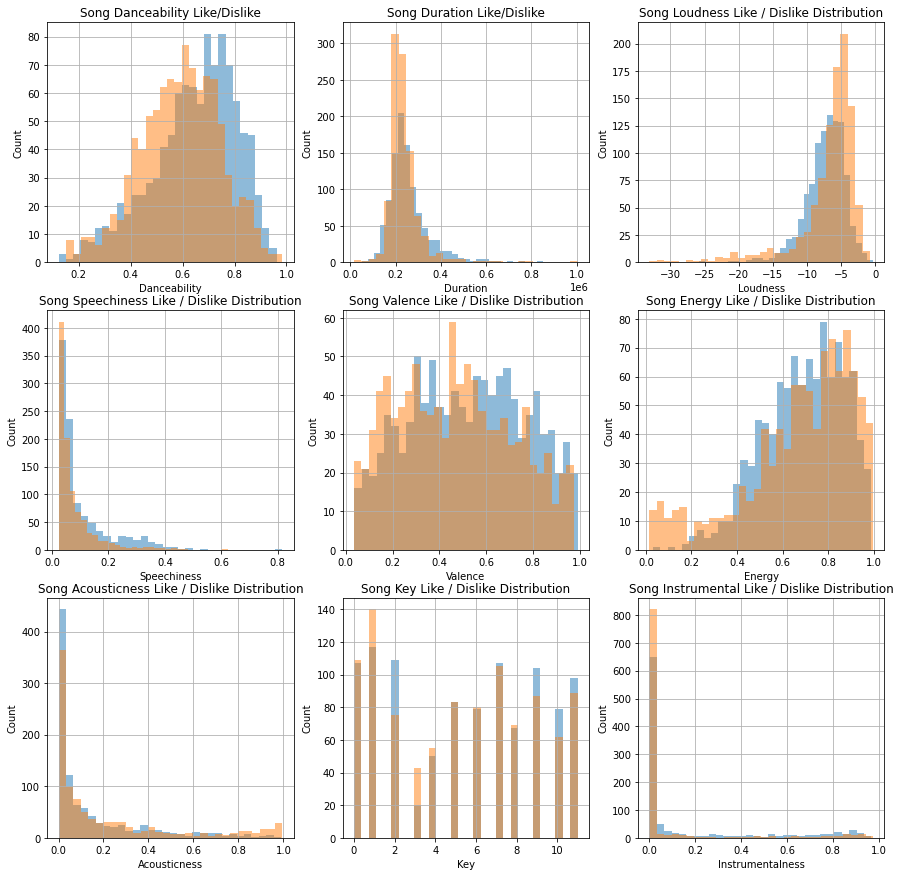

In [9]:
fig2 = plt.figure(figsize=(15,15))

# Danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Danceability Like/Dislike')
pos_danceability.hist(alpha=0.5,bins=30)
ax4 = fig2.add_subplot(331)
neg_danceability.hist(alpha=0.5,bins=30)

# Duration
ax5 = fig2.add_subplot(332)
ax5.set_xlabel('Duration')
ax5.set_ylabel('Count')
ax5.set_title('Song Duration Like/Dislike')
pos_duration.hist(alpha=0.5,bins=30)
ax6 = fig2.add_subplot(332)
neg_duration.hist(alpha=0.5,bins=30)

# Loudness
ax7 = fig2.add_subplot(333)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title('Song Loudness Like / Dislike Distribution')
pos_loudness.hist(alpha=0.5, bins=30)
ax8 = fig2.add_subplot(333)
neg_loudness.hist(alpha=0.5, bins=30)

# Speechiness
ax9 = fig2.add_subplot(334)
ax9.set_xlabel('Speechiness')
ax9.set_ylabel('Count')
ax9.set_title('Song Speechiness Like / Dislike Distribution')
pos_speechiness.hist(alpha=0.5, bins=30)
ax10 = fig2.add_subplot(334)
neg_speechiness.hist(alpha=0.5, bins=30)

# Valence
ax11 = fig2.add_subplot(335)
ax11.set_xlabel('Valence')
ax11.set_ylabel('Count')
ax11.set_title('Song Valence Like / Dislike Distribution')
pos_valence.hist(alpha=0.5, bins=30)
ax12 = fig2.add_subplot(335)
neg_valence.hist(alpha=0.5, bins=30)

# Energy
ax13 = fig2.add_subplot(336)
ax13.set_xlabel('Energy')
ax13.set_ylabel('Count')
ax13.set_title('Song Energy Like / Dislike Distribution')
pos_energy.hist(alpha=0.5, bins=30)
ax14 = fig2.add_subplot(336)
neg_energy.hist(alpha=0.5, bins=30)

# Acoustic
ax15 = fig2.add_subplot(337)
ax15.set_xlabel('Acousticness')
ax15.set_ylabel('Count')
ax15.set_title('Song Acousticness Like / Dislike Distribution')
pos_acousticness.hist(alpha=0.5, bins=30)
ax16 = fig2.add_subplot(337)
neg_acousticness.hist(alpha=0.5, bins=30)

# Key
ax17 = fig2.add_subplot(338)
ax17.set_xlabel('Key')
ax17.set_ylabel('Count')
ax17.set_title('Song Key Like / Dislike Distribution')
pos_key.hist(alpha=0.5, bins=30)
ax18 = fig2.add_subplot(338)
neg_key.hist(alpha=0.5, bins=30)

# Instrumentalness
ax19 = fig2.add_subplot(339)
ax19.set_xlabel('Instrumentalness')
ax19.set_ylabel('Count')
ax19.set_title('Song Instrumental Like / Dislike Distribution')
pos_instrumentalness.hist(alpha=0.5, bins=30)
ax20 = fig2.add_subplot(339)
neg_instrumentalness.hist(alpha=0.5, bins=30)

In [10]:
dtc= DecisionTreeClassifier(min_samples_split=100)
dtc

DecisionTreeClassifier(min_samples_split=100)

In [11]:
X=df.drop(['Unnamed: 0','target','song_title','artist'],axis=1)
X.columns
features=['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']
#features = ['danceability', 'duration_ms', 'loudness', 'speechiness', 'valence', 'energy', 'acousticness', 'key', 'instrumentalness']

In [12]:
Y=df.target

Y=np.ravel(Y)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

X_train.shape

dtc.fit(X_train,Y_train)
dtc.score(X_train,Y_train)

In [17]:
y_pred=dtc.predict(X_test)

In [18]:
pd.DataFrame({'Actual':Y_test,'Predicted':y_pred})

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
500,1,0
501,0,0
502,0,1
503,1,1


In [19]:
score=accuracy_score(Y_test,y_pred)*100
score


66.13861386138615

[Text(303.05172413793105, 526.6125000000001, 'X[4] <= 0.0\ngini = 0.5\nsamples = 1512\nvalue = [742, 770]'),
 Text(163.55172413793105, 492.63750000000005, 'X[9] <= 0.099\ngini = 0.465\nsamples = 762\nvalue = [482, 280]'),
 Text(115.44827586206898, 458.6625, 'X[1] <= 0.78\ngini = 0.375\nsamples = 517\nvalue = [388, 129]'),
 Text(96.20689655172414, 424.6875, 'X[4] <= 0.0\ngini = 0.337\nsamples = 453\nvalue = [356, 97]'),
 Text(76.96551724137932, 390.7125, 'X[1] <= 0.374\ngini = 0.28\nsamples = 363\nvalue = [302, 61]'),
 Text(57.72413793103449, 356.7375, 'gini = 0.499\nsamples = 27\nvalue = [13, 14]'),
 Text(96.20689655172414, 356.7375, 'X[9] <= 0.036\ngini = 0.241\nsamples = 336\nvalue = [289, 47]'),
 Text(57.72413793103449, 322.76250000000005, 'X[7] <= -13.346\ngini = 0.113\nsamples = 133\nvalue = [125, 8]'),
 Text(38.48275862068966, 288.7875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(76.96551724137932, 288.7875, 'X[6] <= 0.579\ngini = 0.1\nsamples = 132\nvalue = [125, 7]'),
 Te

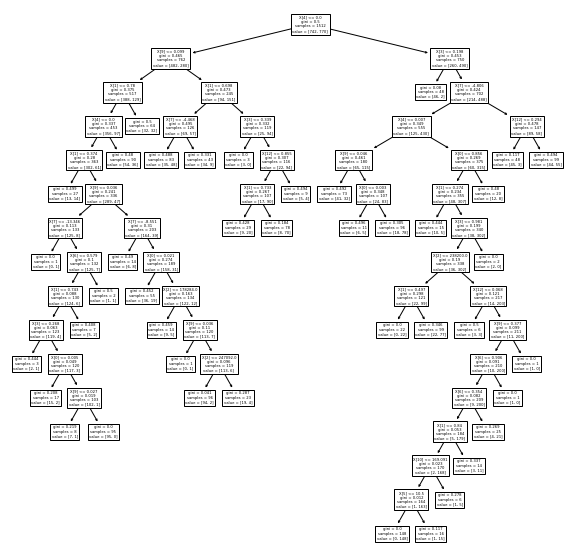

In [20]:
plt.figure(figsize=(10,10))
tree.plot_tree(dtc) 

In [21]:
def show_tree(tree,features,path):
    f=io.StringIO()
    export_graphviz(tree,out_file=f,feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img=imageio.imread(path)
    plt.rcParams['figure.figsize']=(20,20)
    plt.imshow(img)
                                
    
    

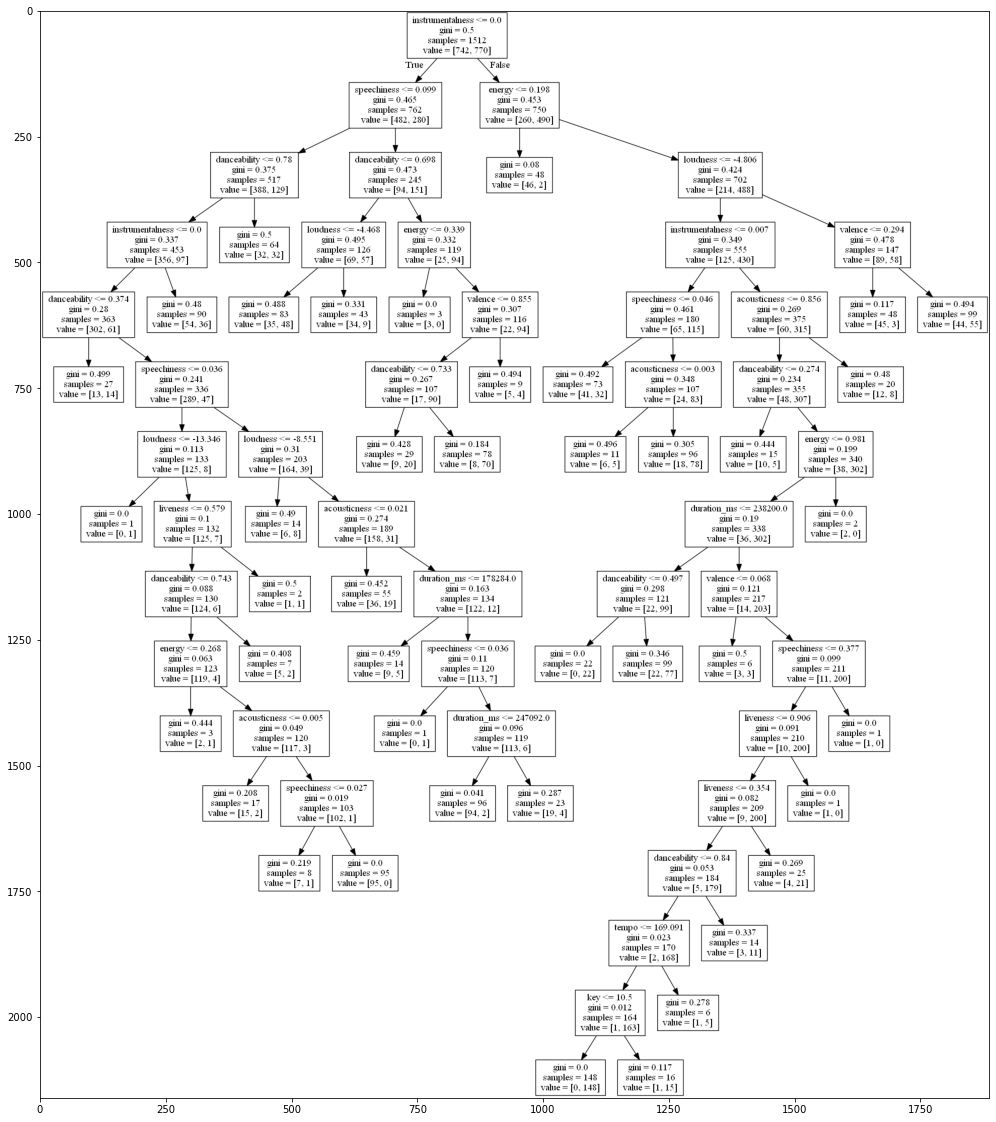

In [22]:
show_tree(dtc,features,'decision_tree')

>>>import graphviz 
>>> dot_data = tree.export_graphviz(clf, out_file=None) 
>>> graph = graphviz.Source(dot_data) 
>>> graph.render("iris") 
The export_graphviz exporter also supports a variety of aesthetic options, including coloring nodes by their class (or value for regression) and using explicit variable and class names if desired. Jupyter notebooks also render these plots inline automatically:

>>>
>>> dot_data = tree.export_graphviz(clf, out_file=None, 
...                      feature_names=iris.feature_names,  
...                      class_names=iris.target_names,  
...                      filled=True, rounded=True,  
...                      special_characters=True)  
>>> graph = graphviz.Source(dot_data)  
>>> graph 

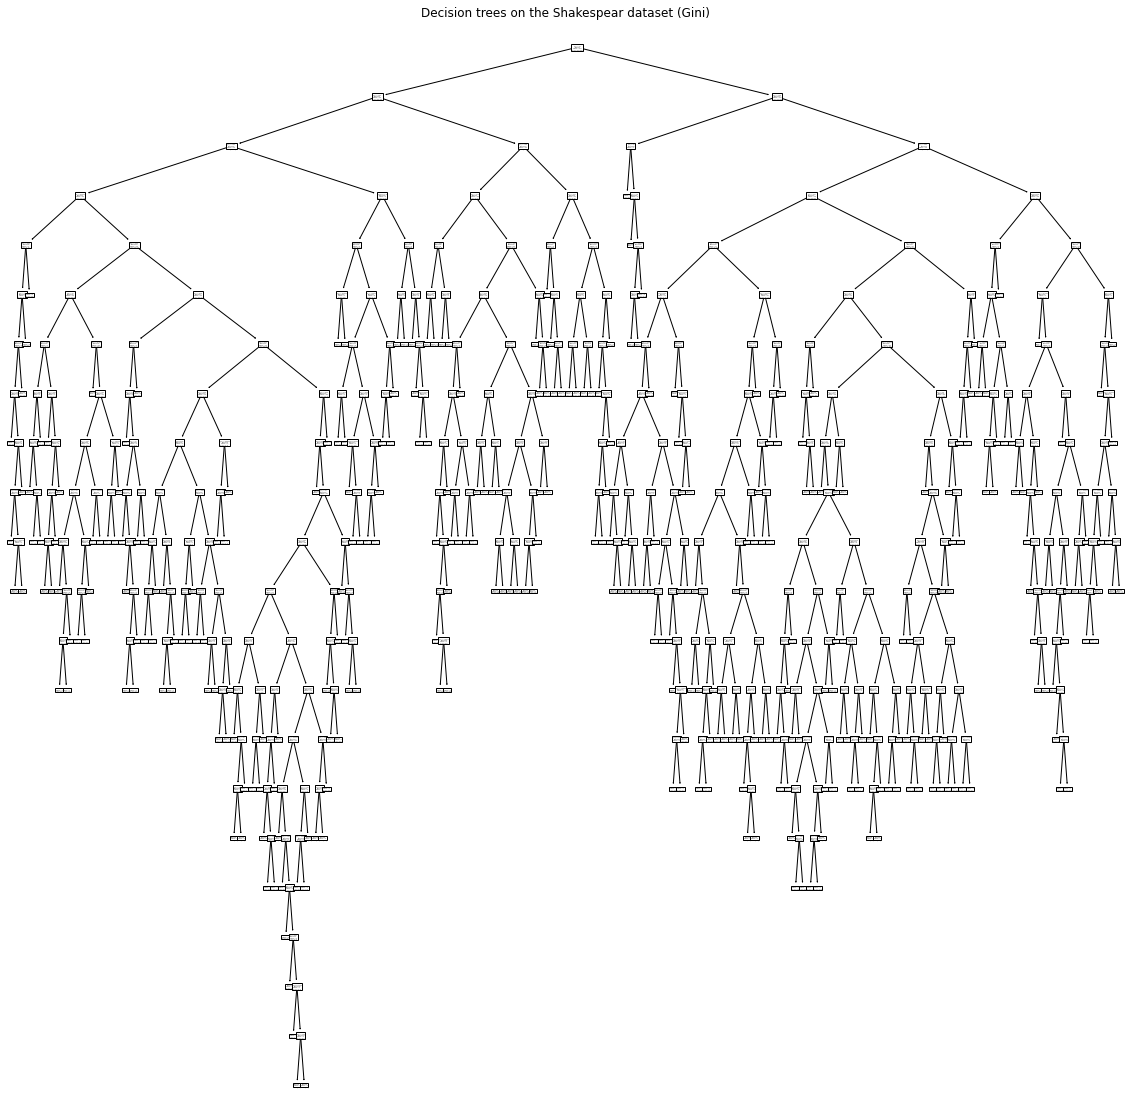

In [23]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
plt.figure(figsize=(20,20))
tree.plot_tree(clf) 
plt.title("Decision trees on the Shakespear dataset (Gini)")
plt.show() 

In [24]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.
